# Introduction

One of the primary objectives of companies with subscription services is to decrease churn and ensure that users are retained as subscribers. In order to do this efficiently and systematically, many companies employ machine learning to predict which users are at the highest risk of churn, so that proper interventions can be effectively deployed to the right audience.

In this problem, we will be tackling the churn prediction problem on a very unique and interesting group of subscribers on a video streaming service.

We have provided a dataset that is a sample of subscriptions that were initiated in 2021, all snapshotted at a particular date before the subscription was cancelled. Subscription cancellation can happen for a multitude of reasons, including:
* the customer completes all content they were interested in, and no longer need the subscription
* the customer finds themselves to be too busy and cancels their subscription until a later time
* the customer determines that the streaming service is not the best fit for them, so they cancel and look for something better suited

Regardless the reason, this video streaming company has a vested interest in understanding the likelihood of each individual customer to churn in their subscription so that resources can be allocated appropriately to support customers. In this problem, we will use EDA and machine learning solution to do just that.

# Exploratory Data Analysis

### Step 1: Importing Required Libraries

In this step, we import all the necessary libraries for our churn prediction project:

- **Data Handling**: `pandas` and `numpy` for data manipulation and numerical operations.
- **Machine Learning**: A variety of models from `scikit-learn`, including:
  - `LogisticRegression`, `RandomForestClassifier`, `KNeighborsClassifier`, `SVC`, and `DecisionTreeClassifier`
  - `DummyClassifier` as a baseline model
  - `train_test_split` for splitting data
  - `roc_auc_score` for evaluating model performance
- **Preprocessing**: `StandardScaler` for feature scaling and `OrdinalEncoder` for encoding categorical variables.
- **Statistical Testing**: `chi2_contingency` from `scipy.stats` to test relationships between categorical variables.
- **Visualization**: `matplotlib` and `seaborn` for creating insightful plots and charts.

We also enable `%matplotlib inline` to display plots directly within the notebook.

In [47]:
# Data manipulation and numerical operations
import pandas as pd  # For working with dataframes
import numpy as np   # For numerical computations

# Machine Learning and Evaluation
from sklearn.metrics import roc_auc_score  # For evaluating model performance using AUC-ROC
from sklearn.model_selection import train_test_split  # For splitting data into training and test sets
from sklearn.dummy import DummyClassifier  # Baseline model for comparison
from sklearn.ensemble import RandomForestClassifier  # Ensemble model using decision trees
from sklearn.linear_model import LogisticRegression  # Linear model for binary classification
from sklearn.neighbors import KNeighborsClassifier  # K-Nearest Neighbors classifier
from sklearn.svm import SVC  # Support Vector Classifier
from sklearn.tree import DecisionTreeClassifier  # Decision Tree classifier
from sklearn.preprocessing import StandardScaler  # For feature scaling
from sklearn.preprocessing import OrdinalEncoder  # For encoding categorical variables
from scipy.stats import chi2_contingency  # For statistical tests on categorical data

# Visualization libraries
from matplotlib import pyplot as plt  # For creating static plots
import seaborn as sns  # For enhanced statistical visualizations

# Enable inline plotting in Jupyter Notebook
%matplotlib inline

### Step 2: Load and Preview the Dataset

We load the training dataset using `pandas.read_csv()` and store it in a DataFrame called `train_df`.

- `train_df.shape` gives us a quick overview of the dataset's dimensions (number of rows and columns).
- `train_df.head()` displays the first five rows, allowing us to preview the structure and content of the data.

This step helps us understand what kind of features are available and how the data is organized before diving into deeper analysis.

In [48]:
# Load the training dataset from a CSV file
train_df = pd.read_csv("train.csv")

# Display the shape of the dataset (rows, columns)
print('train_df Shape:', train_df.shape)

# Display the first 5 rows of the dataset to get an initial look at the data
train_df.head()

train_df Shape: (243787, 21)


,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID,Churn
0,20,11.055215,221.104302,Premium,Mailed check,No,Both,No,Mobile,36.758104,63.531377,10,Sci-Fi,2.176498,4,Male,3,No,No,CB6SXPNVZA,0
1,57,5.175208,294.986882,Basic,Credit card,Yes,Movies,No,Tablet,32.450568,25.725595,18,Action,3.478632,8,Male,23,No,Yes,S7R2G87O09,0
2,73,12.106657,883.785952,Basic,Mailed check,Yes,Movies,No,Computer,7.395160,57.364061,23,Fantasy,4.238824,6,Male,1,Yes,Yes,EASDC20BDT,0
3,32,7.263743,232.439774,Basic,Electronic check,No,TV Shows,No,Tablet,27.960389,131.537507,30,Drama,4.276013,2,Male,24,Yes,Yes,NPF69NT69N,0
4,57,16.953078,966.325422,Premium,Electronic check,Yes,TV Shows,No,TV,20.083397,45.356653,20,Comedy,3.616170,4,Female,0,No,No,4LGYPK7VOL,0


### Step 3: Understanding Feature Definitions

To better interpret the dataset, we load a supplementary file called `data_descriptions.csv`, which contains metadata about each feature:

- **Feature Name**: The name of the column in the dataset.
- **Role**: Indicates whether the column is a feature, target, or identifier.
- **Data Type**: Specifies the type of data (e.g., integer, float, string).
- **Description**: Provides a brief explanation of what the feature represents.

We also adjust the display settings to ensure that all column descriptions are fully visible. This step is crucial for guiding our exploratory data analysis and feature engineering decisions.

In [49]:
# Load the data descriptions file to understand the meaning of each feature
data_descriptions = pd.read_csv('data_descriptions.csv')

# Set display options to show full column width and all columns in the output
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)

# Display the data descriptions to understand feature roles and definitions
data_descriptions

,Column_name,Column_type,Data_type,Description
0,AccountAge,Feature,integer,The age of the user's account in months.
1,MonthlyCharges,Feature,float,The amount charged to the user on a monthly basis.
2,TotalCharges,Feature,float,The total charges incurred by the user over the account's lifetime.
3,SubscriptionType,Feature,object,"The type of subscription chosen by the user (Basic, Standard, or Premium)."
4,PaymentMethod,Feature,string,The method of payment used by the user.
5,PaperlessBilling,Feature,string,Indicates whether the user has opted for paperless billing (Yes or No).
6,ContentType,Feature,string,"The type of content preferred by the user (Movies, TV Shows, or Both)."
7,MultiDeviceAccess,Feature,string,Indicates whether the user has access to the service on multiple devices (Yes or No).
8,DeviceRegistered,Feature,string,"The type of device registered by the user (TV, Mobile, Tablet, or Computer)."
9,ViewingHoursPerWeek,Feature,float,The number of hours the user spends watching content per week.


### Step 4: Descriptive Statistics

We use the `.describe()` method to generate summary statistics for all **numerical features** in the dataset. This includes:

- **Count**: Number of non-null entries
- **Mean**: Average value
- **Standard Deviation (std)**: Measure of spread
- **Min/Max**: Minimum and maximum values
- **25% / 50% / 75%**: Percentiles (quartiles)

These statistics help us understand the distribution, scale, and potential outliers in the data. For example:

- `MonthlyCharges` ranges from approximately \$5 to \$20, with a mean around \$12.5.
- `UserRating` is on a scale from 1 to 5, with a mean of ~3.0.
- `Churn` is a binary variable, with ~18% of users having churned.

This step is crucial for identifying which features may need normalization, transformation, or further investigation.

In [50]:
# Generate summary statistics for all numerical features in the dataset
train_df.describe()

,AccountAge,MonthlyCharges,TotalCharges,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,UserRating,SupportTicketsPerMonth,WatchlistSize,Churn
count,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000
mean,60.083758,12.490695,750.741017,20.502179,92.264061,24.503513,3.002713,4.504186,12.018508,0.181232
std,34.285143,4.327615,523.073273,11.243753,50.505243,14.421174,1.155259,2.872548,7.193034,0.385211
min,1.000000,4.990062,4.991154,1.000065,5.000547,0.000000,1.000007,0.000000,0.000000,0.000000
25%,30.000000,8.738543,329.147027,10.763953,48.382395,12.000000,2.000853,2.000000,6.000000,0.000000
50%,60.000000,12.495555,649.878487,20.523116,92.249992,24.000000,3.002261,4.000000,12.000000,0.000000
75%,90.000000,16.238160,1089.317362,30.219396,135.908048,37.000000,4.002157,7.000000,18.000000,0.000000
max,119.000000,19.989957,2378.723844,39.999723,179.999275,49.000000,4.999989,9.000000,24.000000,1.000000


### Step 5: Dataset Structure Overview

The `.info()` method provides a concise summary of the dataset, including:

- **Number of entries**: 243,787 rows
- **Number of columns**: 21
- **Data types**:
  - `int64`: 5 columns (e.g., `AccountAge`, `Churn`)
  - `float64`: 5 columns (e.g., `MonthlyCharges`, `UserRating`)
  - `object`: 11 columns (categorical or string data, e.g., `SubscriptionType`, `CustomerID`)
- **Missing values**: None — all columns have 243,787 non-null entries
- **Memory usage**: ~39.1 MB

This step helps us understand the types of data we’re working with and confirms that there are no missing values to handle at this stage.

In [51]:
# Display the structure of the dataset, including column names, data types, and non-null counts
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243787 entries, 0 to 243786
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   AccountAge                243787 non-null  int64  
 1   MonthlyCharges            243787 non-null  float64
 2   TotalCharges              243787 non-null  float64
 3   SubscriptionType          243787 non-null  object 
 4   PaymentMethod             243787 non-null  object 
 5   PaperlessBilling          243787 non-null  object 
 6   ContentType               243787 non-null  object 
 7   MultiDeviceAccess         243787 non-null  object 
 8   DeviceRegistered          243787 non-null  object 
 9   ViewingHoursPerWeek       243787 non-null  float64
 10  AverageViewingDuration    243787 non-null  float64
 11  ContentDownloadsPerMonth  243787 non-null  int64  
 12  GenrePreference           243787 non-null  object 
 13  UserRating                243787 non-null  f

### Step 6: Feature Type Classification

In this step, we correct a data type misclassification and organize our features:

- The column `SupportTicketsPerMonth` was incorrectly identified as numerical. Since it represents discrete ticket counts, we convert it to a categorical (`object`) type.

Next, we classify the features into two groups:

### 🟦 Categorical Features
These are non-numeric and typically represent categories or labels:
- `SubscriptionType`
- `PaymentMethod`
- `PaperlessBilling`
- `ContentType`
- `MultiDeviceAccess`
- `DeviceRegistered`
- `GenrePreference`
- `SupportTicketsPerMonth`
- `Gender`
- `ParentalControl`
- `SubtitlesEnabled`

### 🟨 Numerical Features
These are continuous or count-based numeric values:
- `AccountAge`
- `MonthlyCharges`
- `TotalCharges`
- `ViewingHoursPerWeek`
- `AverageViewingDuration`
- `ContentDownloadsPerMonth`
- `UserRating`
- `WatchlistSize`

This classification will guide our preprocessing steps, such as encoding categorical variables and scaling numerical ones.

In [52]:
# Correct the data type of 'SupportTicketsPerMonth' to categorical (object)
train_df['SupportTicketsPerMonth'] = train_df['SupportTicketsPerMonth'].astype('object')

# Identify categorical features (excluding ID and target)
cat_features = train_df.drop(['CustomerID', 'Churn'], axis=1).select_dtypes(include=['object', 'category']).columns.to_list()

# Identify numerical features (excluding ID and target)
num_features = train_df.drop(['CustomerID', 'Churn'], axis=1).select_dtypes(include=['number']).columns.to_list()

# Display the lists
print("Categorical Features:", cat_features)
print("Numerical Features:", num_features)

Categorical Features: ['SubscriptionType', 'PaymentMethod', 'PaperlessBilling', 'ContentType', 'MultiDeviceAccess', 'DeviceRegistered', 'GenrePreference', 'SupportTicketsPerMonth', 'Gender', 'ParentalControl', 'SubtitlesEnabled']
Numerical Features: ['AccountAge', 'MonthlyCharges', 'TotalCharges', 'ViewingHoursPerWeek', 'AverageViewingDuration', 'ContentDownloadsPerMonth', 'UserRating', 'WatchlistSize']


### Step 7: Visualizing Numerical Feature Distributions

To better understand the behavior of each numerical feature, we plot their distributions using **Kernel Density Estimation (KDE)**:

- KDE plots help visualize the **shape** of the data distribution, including skewness, modality, and spread.
- This can reveal patterns such as:
  - **Skewed distributions** (e.g., `TotalCharges`, `AverageViewingDuration`)
  - **Peaks and valleys** indicating common usage patterns
  - **Potential outliers** or unusual values

These insights are useful for guiding preprocessing decisions like normalization, transformation, or outlier handling.

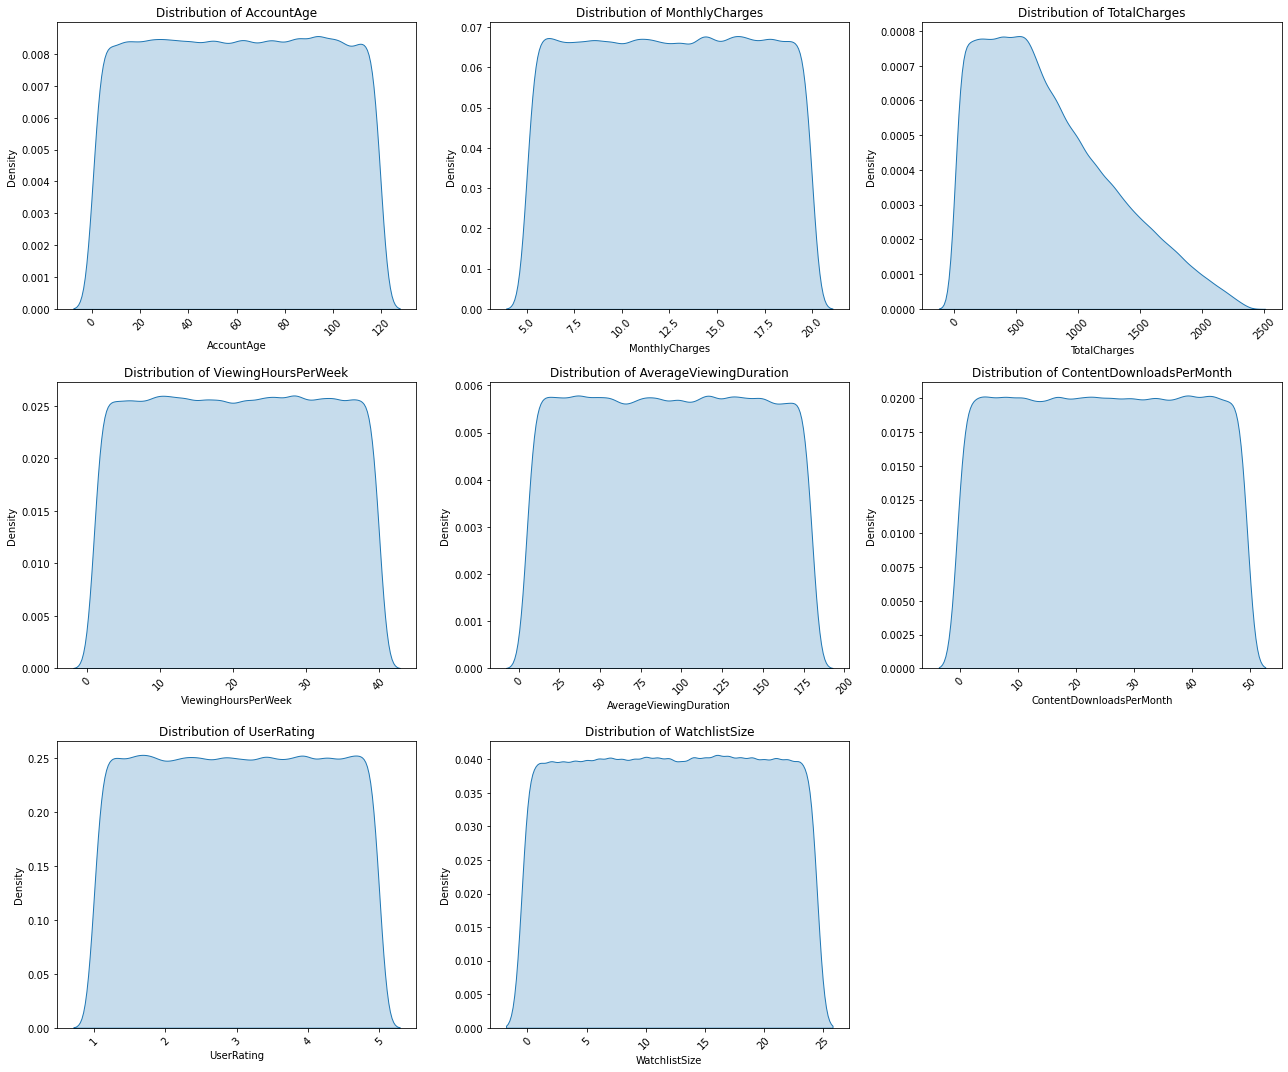

In [53]:
# Visualize the distribution of numerical features using KDE plots

# Set the number of columns for the plot grid
num_cols = 3

# Calculate the number of rows needed based on the number of numerical features
num_rows = (len(num_features) + num_cols - 1) // num_cols

# Create a grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 5 * num_rows))
axes = axes.flatten()  # Flatten the axes array for easy indexing

# Loop through each numerical feature and plot its distribution
for i, col in enumerate(num_features):
    sns.kdeplot(data=train_df[col], ax=axes[i], fill=True)  # KDE plot with shading
    axes[i].set_title(f'Distribution of {col}')  # Set plot title
    axes[i].tick_params(axis='x', rotation=45)   # Rotate x-axis labels for readability

# Remove any unused subplots from the grid
# (i is the index of the last used subplot from the previous loop)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

### Step 8: Visualizing Categorical Feature Distributions

To understand the composition of each categorical feature, we use **count plots** to visualize the frequency of each category:

- This helps identify **dominant categories**, **imbalances**, or **rare values**.
- For example:
  - `SubscriptionType` may show a preference for one plan over others.
  - `PaymentMethod` and `DeviceRegistered` can reveal user behavior patterns.
  - Binary features like `PaperlessBilling`, `ParentalControl`, and `SubtitlesEnabled` show user preferences.

These insights are useful for:
- Encoding strategies (e.g., one-hot vs. ordinal)
- Feature selection
- Understanding potential biases in the dataset

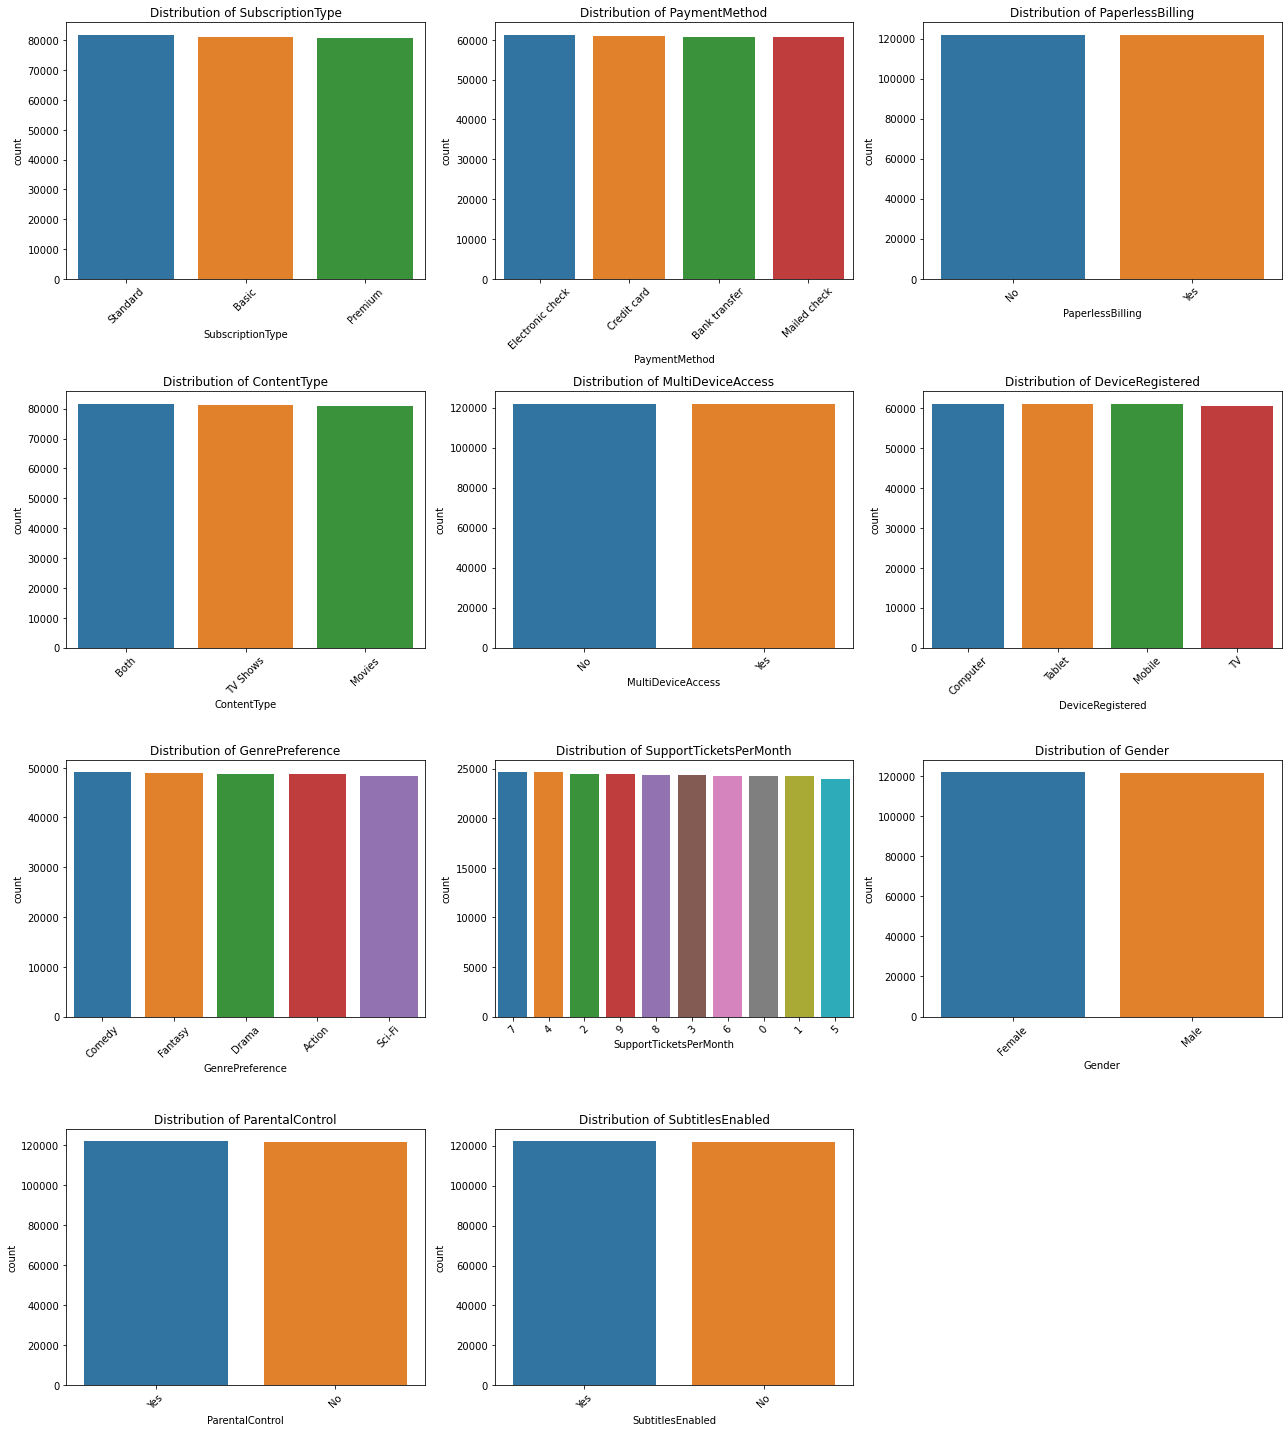

In [54]:
# Visualize the distribution of categorical features using count plots

# Set the number of columns for the plot grid
num_cols = 3

# Calculate the number of rows needed based on the number of categorical features
num_rows = (len(cat_features) + num_cols - 1) // num_cols

# Create a grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 5 * num_rows))
axes = axes.flatten()  # Flatten the axes array for easy indexing

# Loop through each categorical feature and plot its value counts
for i, col in enumerate(cat_features):
    sns.countplot(data=train_df, x=col, ax=axes[i], order=train_df[col].value_counts().index)
    axes[i].set_title(f'Distribution of {col}')  # Set plot title
    axes[i].tick_params(axis='x', rotation=45)   # Rotate x-axis labels for readability

# Remove any unused subplots from the grid
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

### Step 9: Correlation Analysis

We use a **correlation heatmap** to examine the linear relationships between numerical features and the target variable `Churn`.

Key insights:
- Features with stronger positive or negative correlation to `Churn` may be more predictive.
- For example, if `UserRating` or `ViewingHoursPerWeek` shows a strong negative correlation with `Churn`, it suggests that more satisfied or engaged users are less likely to churn.
- Features with near-zero correlation may have limited predictive power on their own but could still be useful in combination with others.

This analysis helps guide feature selection and engineering for the machine learning model.

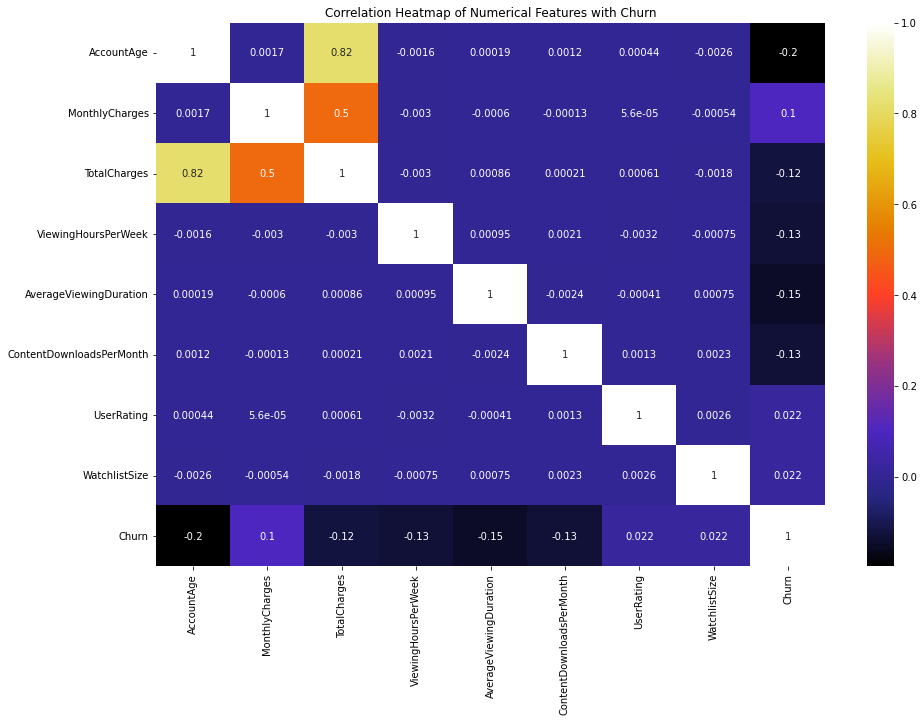

In [55]:
# Create a correlation matrix including the target variable
corr_matrix = pd.concat([train_df[num_features], train_df["Churn"].astype(int)], axis=1).corr()

# Plot the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, cmap='CMRmap', annot=True)
plt.title("Correlation Heatmap of Numerical Features with Churn")
plt.show()

### Step 10: Chi-Squared Test for Categorical Features

To assess whether each categorical feature is statistically associated with churn, we perform a **Chi-squared test of independence**.

- **Null Hypothesis (H₀)**: The feature is independent of churn.
- **Alternative Hypothesis (H₁)**: The feature is dependent on churn.

### 🔍 Results Summary:
- **Significant association** (Reject H₀):
  - `SubscriptionType`
  - `PaymentMethod`
  - `ContentType`
  - `GenrePreference`
  - `Gender`
  - `ParentalControl`
  - `SubtitlesEnabled`
- **No significant association** (Fail to reject H₀):
  - `PaperlessBilling`
  - `MultiDeviceAccess`
  - `DeviceRegistered`

These results help prioritize which categorical features may be more informative for churn prediction.

In [56]:
# Perform Chi-squared tests to assess dependence between categorical features and churn

# Initialize list to store test results
chi2_test = []

# Loop through each categorical feature and perform the test
for column in cat_features:
    contingency_table = pd.crosstab(train_df["Churn"], train_df[column])
    p_value = chi2_contingency(contingency_table)[1]
    if p_value < 0.05:
        chi2_test.append('Reject null hypothesis')  # Significant association
    else:
        chi2_test.append('Fail to reject null hypothesis')  # No significant association

# Compile results into a DataFrame
result = pd.DataFrame(data=[cat_features, chi2_test]).T
result.columns = ['Column', 'Hypothesis result']
result

,Column,Hypothesis result
0,SubscriptionType,Reject null hypothesis
1,PaymentMethod,Reject null hypothesis
2,PaperlessBilling,Fail to reject null hypothesis
3,ContentType,Reject null hypothesis
4,MultiDeviceAccess,Fail to reject null hypothesis
5,DeviceRegistered,Fail to reject null hypothesis
6,GenrePreference,Reject null hypothesis
7,SupportTicketsPerMonth,Reject null hypothesis
8,Gender,Reject null hypothesis
9,ParentalControl,Reject null hypothesis


### Step 11: Multivariate Analysis of Continuous Features by Churn

To explore how continuous numerical features differ between churned and non-churned users, we use:

- **Boxplots**: Show the distribution, median, and potential outliers for each feature by churn class.
- **Histograms with KDE**: Show the density and overlap of feature values between churned and non-churned users.

### 🔍 Observations:
- Features like `UserRating`, `ViewingHoursPerWeek`, and `AverageViewingDuration` may show clear separation between churn classes.
- Skewed distributions or overlapping histograms may suggest the need for transformation or interaction terms.

This analysis helps identify which features are most informative for predicting churn.

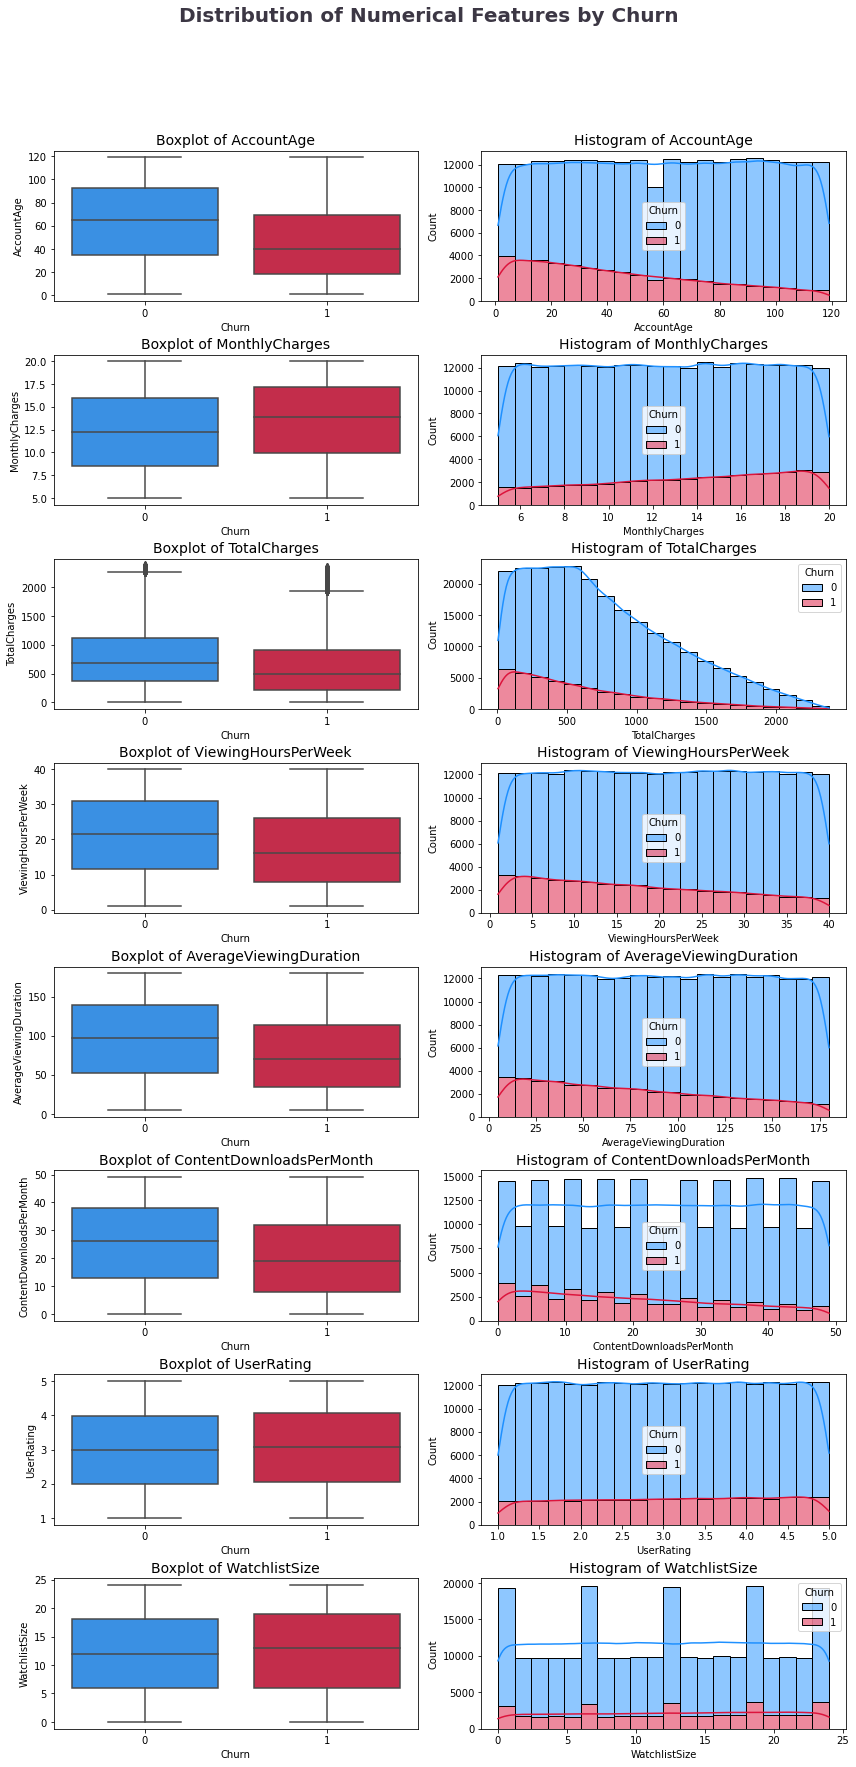

In [57]:
# Identify continuous numerical features
continuous_features = [feature for feature in num_features if train_df[feature].nunique() >= 10]

# Set color palette for churn classes
clr1 = ['#1E90FF', '#DC143C']

# Create subplots for each feature
fig, ax = plt.subplots(len(continuous_features), 2, figsize=(12, 25))
fig.suptitle('Distribution of Numerical Features by Churn', color='#3C3744', fontsize=20, fontweight='bold', ha='center')

# Plot boxplots and histograms for each feature
for i, col in enumerate(continuous_features):
    sns.boxplot(data=train_df, x='Churn', y=col, palette=clr1, ax=ax[i, 0])
    ax[i, 0].set_title(f'Boxplot of {col}', fontsize=14)
    
    sns.histplot(data=train_df, x=col, hue='Churn', bins=20, kde=True, multiple='stack', palette=clr1, ax=ax[i, 1])
    ax[i, 1].set_title(f'Histogram of {col}', fontsize=14)

# Adjust layout
fig.tight_layout()
fig.subplots_adjust(top=0.90)

# Save the figure
plt.savefig('multivariate_num.png')
plt.show()

### Step 12: Churn Distribution Overview

To understand the overall churn rate in the dataset, we visualize the proportion of customers who have churned vs. those who have not.

### 📊 Pie Chart Insights:
- The chart shows the **percentage split** between:
  - **Churned** customers (labelled as `Churned`)
  - **Active** customers (labelled as `Not churned`)
- This helps assess **class imbalance**, which is important for model training and evaluation.

If the churn rate is low (e.g., <20%), special techniques like **resampling** or **class weighting** may be needed to improve model performance.

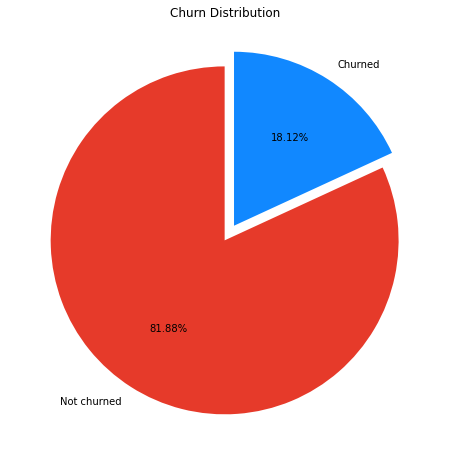

In [58]:
# Load the dataset
df1 = train_df.copy()

# Replace binary churn values with descriptive labels
df1['Churn'] = np.where(df1['Churn'] == 1, 'Churned', 'Not churned')

# Calculate percentage distribution of churn classes
percentage = df1['Churn'].value_counts(normalize=True) * 100
labels = ['Not churned', 'Churned']

# Set up the pie chart
fig, ax = plt.subplots(figsize=(15, 8))
explode = (0, 0.1)  # Slightly separate the 'Churned' slice
colors = ['#e63a2a', '#1188ff']  # Red for churned, blue for not churned

# Plot the pie chart
ax.pie(percentage, labels=labels, startangle=90, autopct='%1.2f%%', explode=explode, colors=colors)
ax.set_title("Churn Distribution")
plt.show()

### Step 13: Categorical Features vs Churn

We visualize how each categorical feature relates to churn using **count plots**:

- Each plot shows the frequency of categories split by churn status.
- This helps identify patterns such as:
  - Certain `SubscriptionType` or `PaymentMethod` categories having higher churn.
  - Preferences in `ContentType`, `DeviceRegistered`, or `ParentalControl` settings influencing churn behavior.

These insights are valuable for feature engineering and understanding customer behavior..

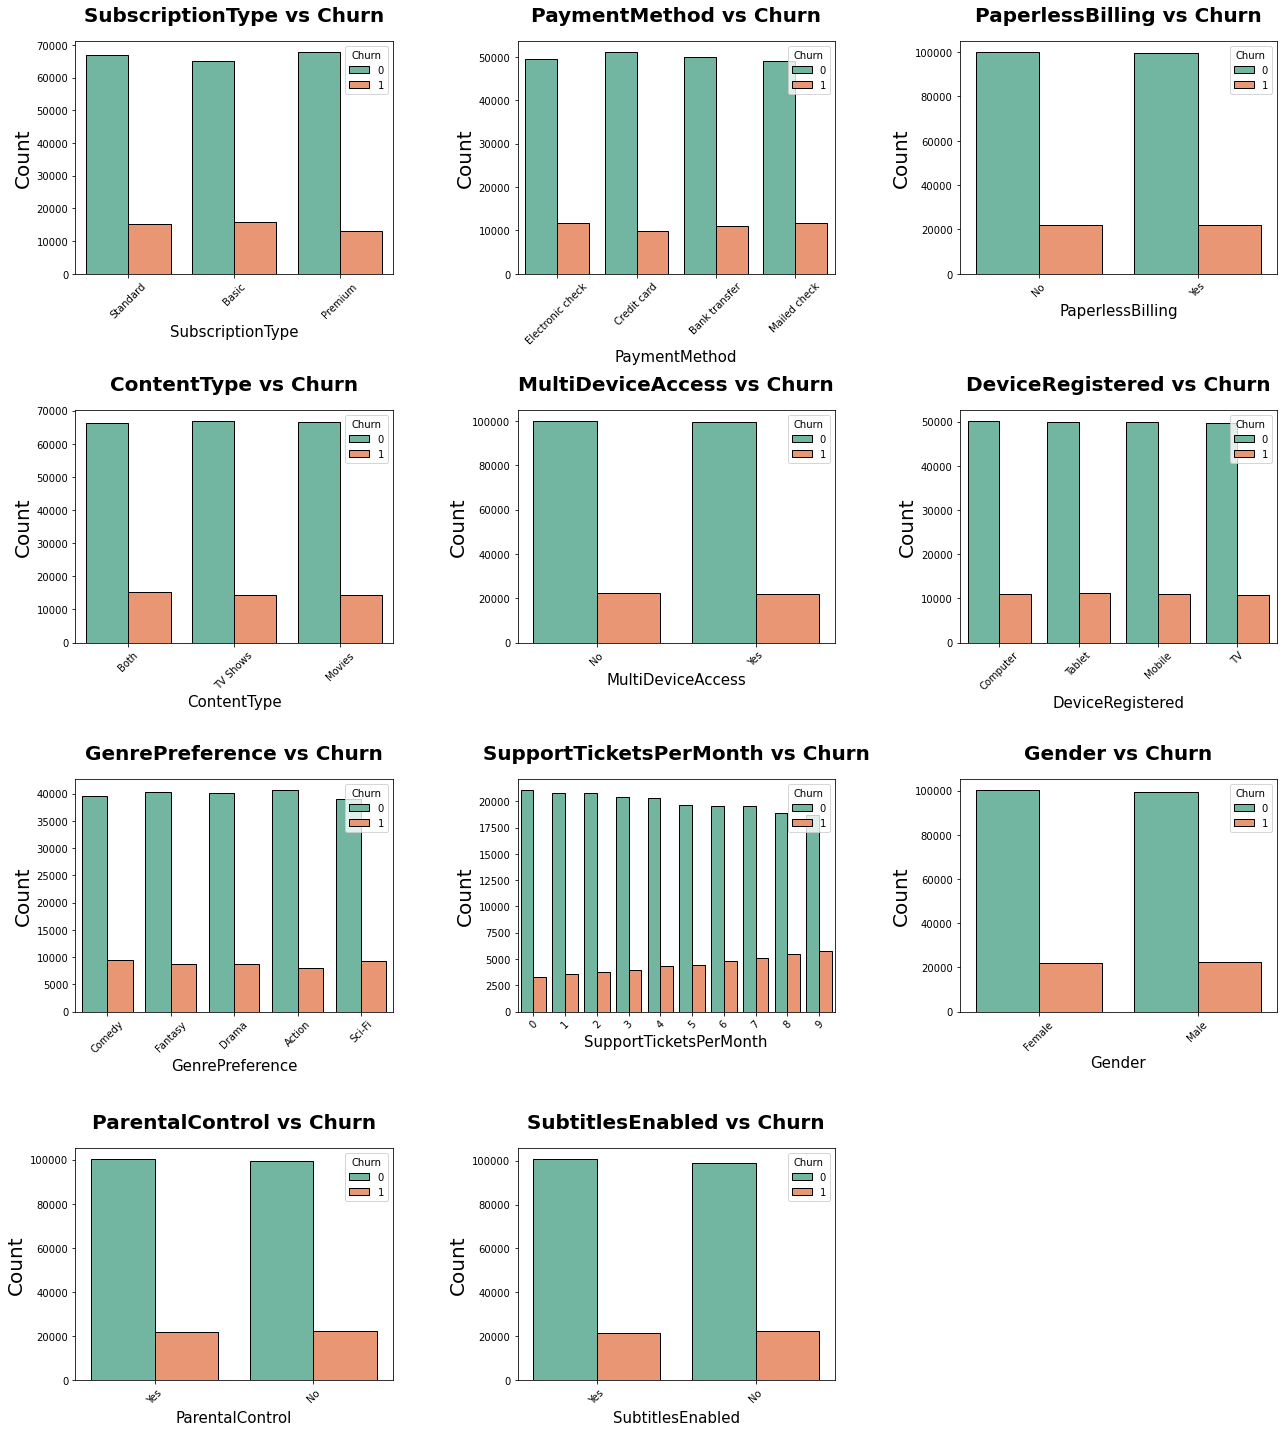

<Figure size 432x288 with 0 Axes>

In [59]:
# Set up the plot grid
num_cols = 3
num_rows = (len(cat_features) + num_cols - 1) // num_cols
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 5 * num_rows))
axes = axes.flatten()  # Flatten the axes array for easy indexing

# Plot count plots for each categorical feature grouped by churn
for i, col in enumerate(cat_features):
    if col == 'SupportTicketsPerMonth':
        # Order numerically for SupportTicketsPerMonth
        order = sorted(train_df[col].dropna().unique(), key=lambda x: int(x))
    else:
        order = train_df[col].value_counts().index

    sns.countplot(x=col, hue='Churn', data=train_df, ax=axes[i],
                  order=order, ec='black', palette='Set2')
    axes[i].set_title(f'{col} vs Churn', weight='bold', fontsize=20, pad=20)
    axes[i].set_ylabel('Count', fontsize=20)
    axes[i].set_xlabel(col, fontsize=15)
    axes[i].tick_params(axis='x', rotation=45)

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Save the figure
plt.savefig('multivariate_cat.png')
plt.show()

# Modeling

### Step 14: Installing Required Libraries

🔧 Installing Required Libraries
Before diving into the classification modeling, we need to ensure that all necessary Python libraries are installed. These libraries support various tasks such as:

- Data preprocessing and modeling: scikit-learn, xgboost
- Handling imbalanced datasets: imbalanced-learn (also known as imblearn)
- Data visualization: seaborn

⚠️ Note: These installation commands are commented out to avoid reinstallation if the packages are already available. You can uncomment and run them if needed.


In [60]:
# Install necessary packages for data preprocessing, modeling, and visualization.
# Uncomment and run these lines if the packages are not already installed in your environment.

# !pip install imblearn                # For handling imbalanced datasets
# !pip install -U scikit-learn         # Upgrade scikit-learn to the latest version
# !pip install seaborn --upgrade       # Upgrade seaborn for better visualization support
# !pip install xgboost                 # XGBoost - a powerful gradient boosting framework
# !pip install imbalanced-learn==0.8.1 # Specific version of imbalanced-learn for compatibility

### Step 14: Importing Libraries and Setting Up the Environment
This section imports all the necessary Python libraries used throughout the classification modeling process. Here's a quick breakdown:

- Data Handling: pandas and numpy for data manipulation and numerical operations.
- Modeling: A variety of classifiers from scikit-learn including logistic regression, decision trees, random forests, SVMs, and KNN.
- Evaluation: Tools to assess model performance such as ROC AUC, confusion matrix, and classification reports.
- Preprocessing: Scaling and encoding techniques to prepare data for modeling.
- Imbalanced Data Handling: SMOTE and ImbPipeline help address class imbalance issues.
- Visualization: matplotlib and seaborn for creating insightful plots.
- Display Settings: Ensures that all columns and full text are visible in notebook outputs for better readability.

In [61]:
# --- Data Handling ---
import pandas as pd  # For data manipulation and analysis
import numpy as np   # For numerical operations

# --- Machine Learning & Evaluation ---
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix  # Evaluation metrics
from sklearn.model_selection import train_test_split, GridSearchCV  # Data splitting and hyperparameter tuning
from sklearn.ensemble import RandomForestClassifier  # Ensemble model
from sklearn.linear_model import LogisticRegression  # Linear model
from sklearn.neighbors import KNeighborsClassifier  # K-Nearest Neighbors
from sklearn.svm import SVC  # Support Vector Classifier
from sklearn.tree import DecisionTreeClassifier  # Decision Tree model
# --- Preprocessing ---
from sklearn.preprocessing import StandardScaler  # Feature scaling
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder  # Encoding categorical variables
from sklearn.compose import ColumnTransformer  # Apply different preprocessing to different columns

# --- Statistical Testing ---
from scipy.stats import chi2_contingency  # Chi-squared test for categorical feature selection

# --- Handling Imbalanced Data ---
from imblearn.over_sampling import SMOTE  # Synthetic Minority Over-sampling Technique
from imblearn.pipeline import Pipeline as ImbPipeline  # Pipeline that supports imbalanced-learn components

# --- Visualization ---
from matplotlib import pyplot as plt  # Plotting
import seaborn as sns  # Statistical data visualization
# Ensures plots are displayed inline in Jupyter notebooks
%matplotlib inline  
# --- Display Settings ---
pd.set_option('display.max_colwidth', None)  # Show full content in cells
pd.set_option('display.max_columns', None)   # Show all columns in DataFrame outputs

### Step 15: Loading the Dataset
In this step, we load the training dataset from a CSV file named train.csv using pandas. This dataset will be used to train and evaluate our classification models.

- train_df.shape gives us a quick overview of the dataset's dimensions (number of rows and columns).
- train_df.head() displays the first five rows, allowing us to inspect the structure and content of the data.

✅ This is a good point to start exploring the dataset further—checking for missing values, data types, and class distribution.

In [62]:
# Load the training dataset from a CSV file
train_df = pd.read_csv("train.csv")

# Display the shape of the dataset (rows, columns)
print('train_df Shape:', train_df.shape)

# Display the first few rows of the dataset to get an overview
train_df.head()

train_df Shape: (243787, 21)


,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID,Churn
0,20,11.055215,221.104302,Premium,Mailed check,No,Both,No,Mobile,36.758104,63.531377,10,Sci-Fi,2.176498,4,Male,3,No,No,CB6SXPNVZA,0
1,57,5.175208,294.986882,Basic,Credit card,Yes,Movies,No,Tablet,32.450568,25.725595,18,Action,3.478632,8,Male,23,No,Yes,S7R2G87O09,0
2,73,12.106657,883.785952,Basic,Mailed check,Yes,Movies,No,Computer,7.395160,57.364061,23,Fantasy,4.238824,6,Male,1,Yes,Yes,EASDC20BDT,0
3,32,7.263743,232.439774,Basic,Electronic check,No,TV Shows,No,Tablet,27.960389,131.537507,30,Drama,4.276013,2,Male,24,Yes,Yes,NPF69NT69N,0
4,57,16.953078,966.325422,Premium,Electronic check,Yes,TV Shows,No,TV,20.083397,45.356653,20,Comedy,3.616170,4,Female,0,No,No,4LGYPK7VOL,0


### Step 15: Model Training and Evaluation Function
This function encapsulates the entire process of preprocessing, model training, and evaluation for a classification task. Here's what it does:

- Feature Separation: Splits the input DataFrame into features (X) and target (y), assuming the target column is named 'Churn'.

- Feature Identification: Automatically detects categorical and numerical features. Categorical features are further split into:

    - Ordinal: Features with a meaningful order (e.g., 'SubscriptionType').
    - Nominal: Features without order, encoded using one-hot encoding.
    
- Preprocessing Pipeline:
    - Applies appropriate encoders and scaling.
    - Uses ColumnTransformer to apply transformations selectively.
    
- Modeling Pipeline:

    - Combines preprocessing with SMOTE to handle class imbalance.
    - Uses LogisticRegression as the classifier.
    
- Model Training and Evaluation:

    - Splits the data into training and test sets.
    - Trains the pipeline.
    - Evaluates using ROC AUC, confusion matrix, and classification report.
    
🧠 This modular approach makes it easy to swap out models or preprocessing steps and ensures reproducibility.

In [63]:
def model_fit_evaluate(train_df_in, step_description_in):
    # Create a copy of the input DataFrame to avoid modifying the original
    train_df_mod = train_df_in.copy()

    # Separate features and target variable
    X = train_df_mod.drop('Churn', axis=1)
    y = train_df_mod['Churn']

    # Identify categorical and numerical features
    cat_features = X.select_dtypes(include=['object', 'category']).columns.to_list()
    num_features = X.select_dtypes(include=['number']).columns.to_list()

    # Define ordinal and one-hot encoded categorical features
    ord_cat_features = ['SubscriptionType']
    order = [['Basic', 'Standard', 'Premium']]  # Define order for ordinal encoding
    ohe_cat_features = [col for col in cat_features if col not in ord_cat_features]

    # Define transformers for preprocessing
    ordinal_encoder = OrdinalEncoder(categories=order)
    onehot_encoder = OneHotEncoder(drop='first', sparse=False)  # Avoid dummy variable trap

    # Combine preprocessing steps using ColumnTransformer
    preprocessor = ColumnTransformer(transformers=[
        ('ord', ordinal_encoder, ord_cat_features),
        ('ohe', onehot_encoder, ohe_cat_features),
        ('scaler', StandardScaler(), num_features)
    ])

    # Define the modeling pipeline
    pipeline = ImbPipeline(steps=[
        ('preprocessor', preprocessor),         # Apply preprocessing
        ('smote', SMOTE(random_state=42)),      # Handle class imbalance
        ('clf', LogisticRegression())           # Classification model
    ])

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

    # Fit the pipeline on training data
    pipeline.fit(X_train, y_train)

    # Predict probabilities for ROC AUC evaluation
    predicted_probability = pipeline.predict_proba(X_test)[:, 1]

    # Apply threshold to convert probabilities to binary predictions
    threshold = 0.5
    y_pred = (predicted_probability >= threshold).astype(int)

    # Print evaluation metrics
    print(f'---------- {step_description_in} ----------')
    print("ROC AUC Score:", roc_auc_score(y_test, predicted_probability))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

    return

### Step 16: Data Cleaning and Baseline Model Evaluation
Before training the model, we remove two columns:

- CustomerID: A unique identifier that doesn't contribute to prediction and may introduce noise.
- TotalCharges: removed due to correlation with other features.
- 'PaperlessBilling', 'MultiDeviceAccess', 'DeviceRegistered' are removed because they show weak correlation in chi-squared test

We then pass the cleaned dataset to the model_fit_evaluate() function to train a baseline logistic regression model and evaluate its performance.

📊 This baseline serves as a reference point for future model improvements, such as feature engineering, hyperparameter tuning, or trying different algorithms.

In [64]:
# Drop irrelevant or problematic columns from the dataset
# 'CustomerID' is likely a unique identifier and not useful for prediction
# 'TotalCharges' removed due to multicollinearity
# 'PaperlessBilling', 'MultiDeviceAccess', 'DeviceRegistered' are removed
# because they show weak correlation in chi-squared test
train_df_mod = train_df.drop(['CustomerID', 'TotalCharges', 'PaperlessBilling', 'MultiDeviceAccess', 'DeviceRegistered'], axis=1)

# Run the model training and evaluation function on the cleaned dataset
model_fit_evaluate(train_df_mod, 'Baseline dataset')

---------- Baseline dataset ----------
ROC AUC Score: 0.752425228350831
Confusion Matrix:
 [[33986 15915]
 [ 3432  7614]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.68      0.78     49901
           1       0.32      0.69      0.44     11046

    accuracy                           0.68     60947
   macro avg       0.62      0.69      0.61     60947
weighted avg       0.80      0.68      0.72     60947



## 🎯 Business Goal: Retain Potential Churn Customers
The primary objective of this classification model is to identify customers who are likely to churn, so that the business can take proactive retention actions (e.g., offering discounts, personalized support, or loyalty programs).

## 📈 Why Recall Matters Most
In this context, recall is the most important evaluation metric. Here's why:

- Recall (also known as sensitivity or true positive rate) measures the proportion of actual churners that the model correctly identifies.
- A high recall means we are catching most of the customers who are at risk of leaving.
- A low recall means many churners are slipping through undetected — a missed opportunity for retention.

## ✅ Goal: Maximize recall to ensure we identify as many potential churners as possible.

## ⚖️ Trade-off: Precision vs. Recall
- Increasing recall often comes at the cost of lower precision (i.e., more false positives).
- In churn prediction, this trade-off is acceptable because:
    - The cost of a false positive (offering a retention incentive to a loyal customer) is usually lower than the cost of a false negative (losing a customer who could have been retained).
    
## 🔧 How to Increase Recall
To improve recall, consider the following strategies:

- Adjust the classification threshold:
    - Lowering the threshold (e.g., from 0.5 to 0.3) increases the number of predicted churners.
    - This boosts recall but may reduce precision.

- Use more complex models:
    - Try ensemble methods like Random Forest, XGBoost, or Gradient Boosting which often capture patterns better than logistic regression.
    
- Feature engineering:
    - Create new features that capture customer behavior trends (e.g., recent activity drop, payment delays).
    
- Hyperparameter tuning:
    - Use GridSearchCV or RandomizedSearchCV to find optimal model settings.

- Handle class imbalance:
    - We're already using SMOTE, which is great! We can also try ensemble methods with class weighting.